In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [ ]:
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000
Number of images in x_test 10000


In [ ]:
import keras
input_shape=(32,32,3)
num_classes=10
# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(y_train, num_classes)
test_labels = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training) # pick a random number
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [ ]:
np.random.seed(123)
model=Sequential()
model.add(Conv2D(32 ,kernel_size =( 3, 3) ,input_shape=input_shape,activation='relu'))
model.add(Conv2D(32 ,kernel_size =( 3, 3) ,input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64 ,kernel_size =( 3, 3) ,input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64 ,kernel_size =( 3, 3) ,input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
log=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 164s 126ms/step - loss: 1.6274 - accuracy: 0.4010 - val_loss: 1.3411 - val_accuracy: 0.5172
Epoch 2/10
1250/1250 [==============================] - 140s 112ms/step - loss: 1.2622 - accuracy: 0.5473 - val_loss: 1.1282 - val_accuracy: 0.6035
Epoch 3/10
1250/1250 [==============================] - 143s 114ms/step - loss: 1.1033 - accuracy: 0.6106 - val_loss: 0.9907 - val_accuracy: 0.6535
Epoch 4/10
1250/1250 [==============================] - 142s 114ms/step - loss: 1.0001 - accuracy: 0.6492 - val_loss: 0.9190 - val_accuracy: 0.6853
Epoch 5/10
1250/1250 [==============================] - 143s 114ms/step - loss: 0.9236 - accuracy: 0.6758 - val_loss: 0.8823 - val_accuracy: 0.6937
Epoch 6/10
1250/1250 [==============================] - 140s 112ms/step - loss: 0.8684 - accuracy: 0.6970 - val_loss: 0.8878 - val_accuracy: 0.6924
Epoch 7/10
1250/1250 [==============================] - 143s 114ms/step - loss: 0.8176 - accuracy: 0.7114 - val_

Text(0.5, 1.0, 'Performance of Normal-CNN')

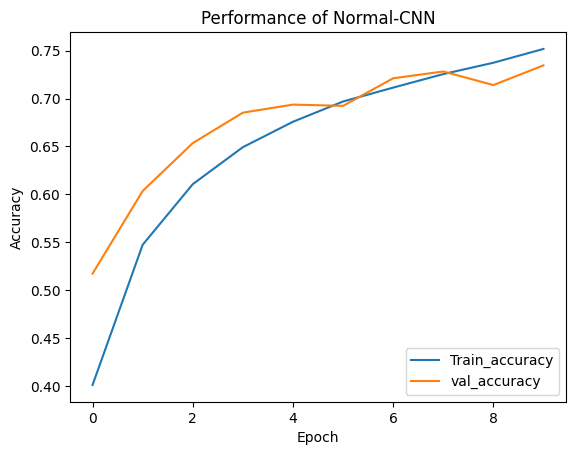

In [ ]:
plt.plot(log.history['accuracy'], label='Train_accuracy')
plt.plot(log.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Performance of Normal-CNN')

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.7952 - accuracy: 0.7267


[0.7952331304550171, 0.7267000079154968]

In [ ]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

NameError: ignored

In [ ]:
predicted_classes1 =model.predict(x_test)
predicted_classes1=tf.argmax(predicted_classes1,axis=1)
predicted_classes1

313/313 [==============================] - 9s 29ms/step


<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([3, 8, 8, ..., 5, 1, 7])>

In [ ]:
test_labels = test_labels.argmax(1)

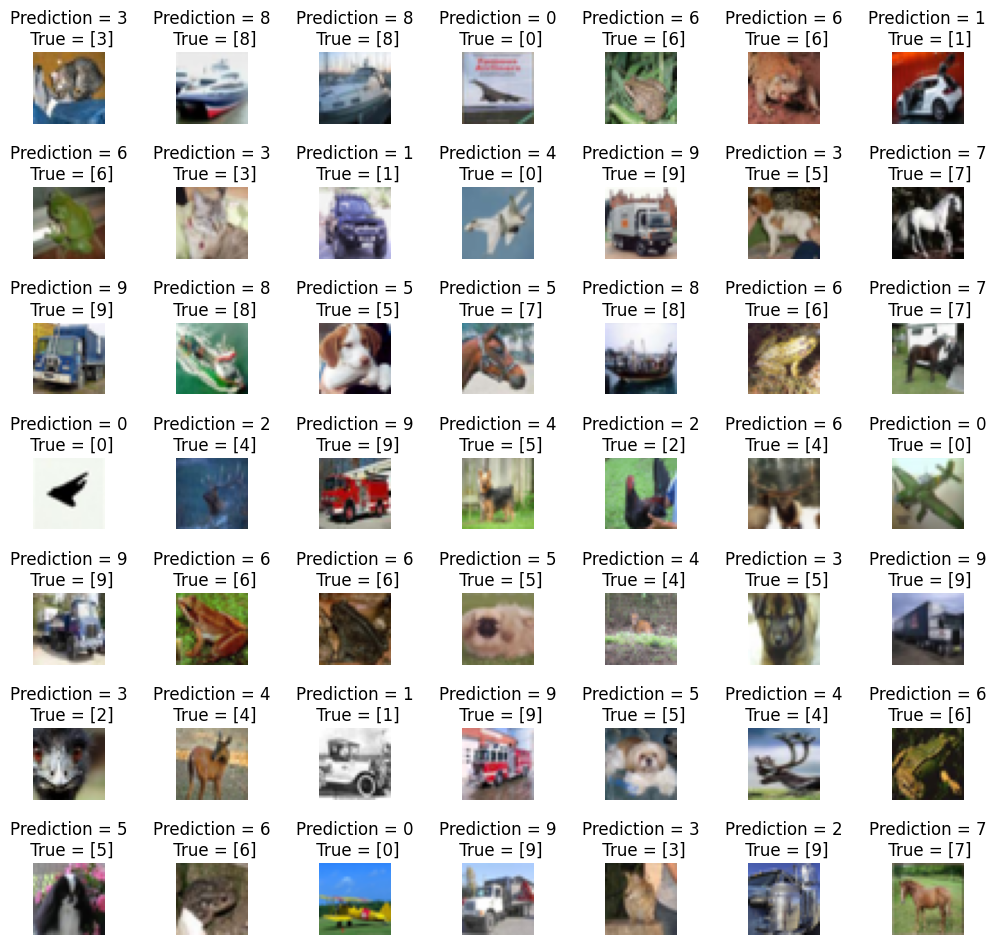

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes1[i], y_test[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

<Axes: >

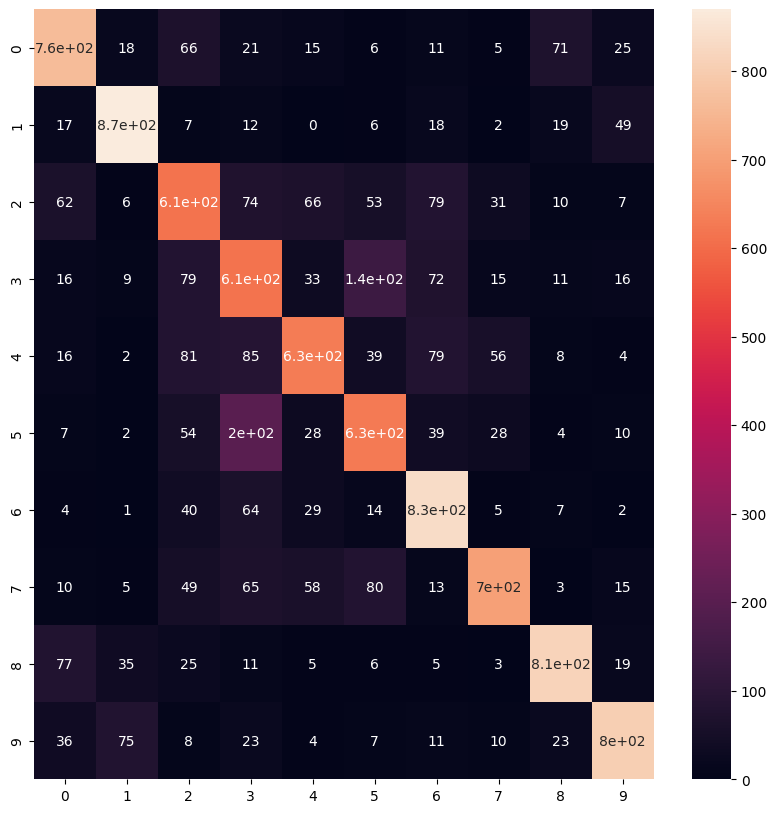

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels, predicted_classes1)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

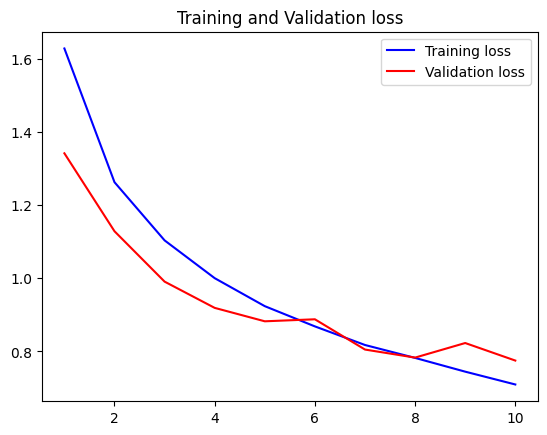

In [ ]:
acc = log.history['accuracy']
val_acc = log.history['val_accuracy']
loss = log.history['loss']
val_loss =log.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()